In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

### Generating Dataset

In [2]:
X, y = make_blobs(n_samples = 1000, centers = 3, n_features = 2, random_state = 10)

In [3]:
X.shape, y.shape

((1000, 2), (1000,))

### Visualising the dataset

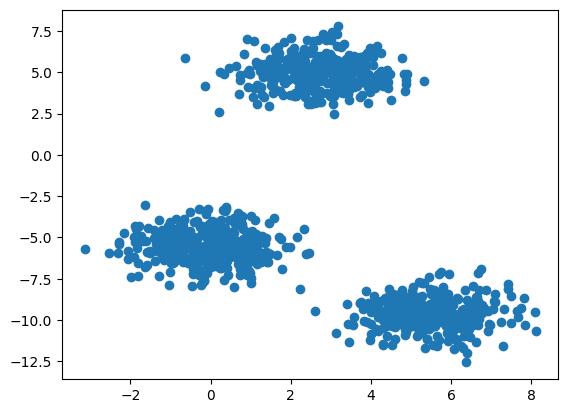

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

### Splitting the dataset into train and test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [6]:
X_train.shape, y_train.shape

((700, 2), (700,))

In [7]:
X_test.shape, y_test.shape

((300, 2), (300,))

### Selecting **K** manually using **Elbow Method**

In [8]:
WCSS = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 'auto')
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)

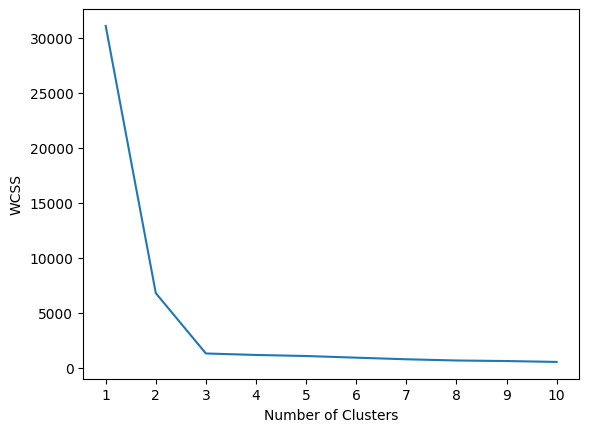

In [9]:
plt.plot(range(1, 11), WCSS)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto')

In [11]:
y_train_labels = kmeans.fit_predict(X_train)

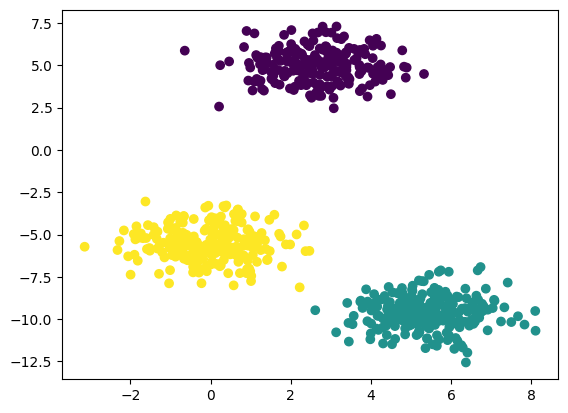

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train_labels)

### Using **Knee Locator** to detect optimal number of clusters

In [13]:
from kneed import KneeLocator

In [14]:
knee = KneeLocator(range(1, 11), WCSS, curve = 'convex', direction = 'decreasing')

In [15]:
knee.elbow

3

### Silhouette Score

In [16]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 'auto')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [17]:
silhouette_coefficients

[0.722757402775319,
 0.7764545903804775,
 0.6088452610199436,
 0.46505686721131123,
 0.30593084079576555,
 0.31478076025210955,
 0.32178326178240785,
 0.34016058412539246,
 0.32592302841234716]

### Plotting silhouette scores

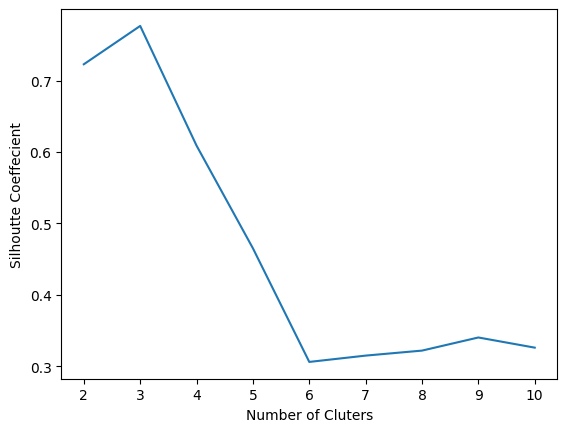

In [18]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()